In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import pandas as pd
import pickle
import scipy
from sklearn import svm
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, mutual_info
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
import matplotlib.pyplot as plt  

In [2]:
# load CountVectorizer data from the recipe_text_features_countvec folder
train_name_vocab = pickle.load(open("COMP30027_2021_Project2_datasets/recipe_text_features_countvec/train_name_countvectorizer.pkl", "rb"))
train_name_vocab_dict = train_name_vocab.vocabulary_

train_ingr_vocab = pickle.load(open("COMP30027_2021_Project2_datasets/recipe_text_features_countvec/train_ingr_countvectorizer.pkl", "rb"))
train_ingr_vocab_dict = train_ingr_vocab.vocabulary_

train_steps_vocab = pickle.load(open("COMP30027_2021_Project2_datasets/recipe_text_features_countvec/train_steps_countvectorizer.pkl", "rb"))
train_steps_vocab_dict = train_steps_vocab.vocabulary_

C:\Users\84907\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
# load the a sparse matrix of the Bag-of-Word from the recipe_text_features_countvec folder
train_name_vec = scipy.sparse.load_npz('COMP30027_2021_Project2_datasets/recipe_text_features_countvec/train_name_vec.npz')
train_steps_vec = scipy.sparse.load_npz('COMP30027_2021_Project2_datasets/recipe_text_features_countvec/train_steps_vec.npz')
train_ingr_vec = scipy.sparse.load_npz('COMP30027_2021_Project2_datasets/recipe_text_features_countvec/train_ingr_vec.npz')

test_name_vec = scipy.sparse.load_npz('COMP30027_2021_Project2_datasets/recipe_text_features_countvec/test_name_vec.npz')
test_steps_vec = scipy.sparse.load_npz('COMP30027_2021_Project2_datasets/recipe_text_features_countvec/test_steps_vec.npz')
test_ingr_vec = scipy.sparse.load_npz('COMP30027_2021_Project2_datasets/recipe_text_features_countvec/test_ingr_vec.npz')



In [4]:
# load the matrix of Doc2Vec from the recipe_text_features_doc2vec50
train_name_doc2vec50 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec50\train_name_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
train_steps_doc2vec50 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec50\train_steps_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
train_ingr_doc2vec50 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec50\train_ingr_doc2vec50.csv", index_col = False, delimiter = ',', header=None)

test_name_doc2vec50 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec50\test_name_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
test_steps_doc2vec50 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec50\test_steps_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
test_ingr_doc2vec50 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec50\test_ingr_doc2vec50.csv", index_col = False, delimiter = ',', header=None)


In [5]:
# load the matrix of Doc2Vec from the recipe_text_features_doc2vec100
train_name_doc2vec100 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec100\train_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
train_steps_doc2vec100 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec100\train_steps_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
train_ingr_doc2vec100 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec100\train_ingr_doc2vec100.csv", index_col = False, delimiter = ',', header=None)

test_name_doc2vec100 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec100\test_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
test_steps_doc2vec100 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec100\test_steps_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
test_ingr_doc2vec100 = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_text_features_doc2vec100\test_ingr_doc2vec100.csv", index_col = False, delimiter = ',', header=None)


In [6]:
# load the training class data
data_train = pd.read_csv(r"COMP30027_2021_Project2_datasets\recipe_train.csv", index_col = False, delimiter = ',', header=0)
y_train = data_train['duration_label']


 Random Forest  :


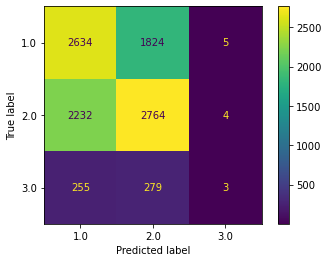

name acc 0.5401 Time: 2.5387320518493652


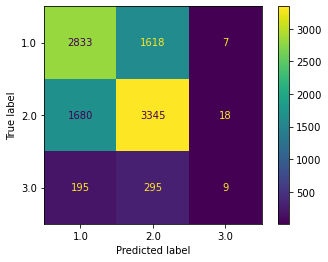

steps acc 0.6187 Time: 2.5488414764404297


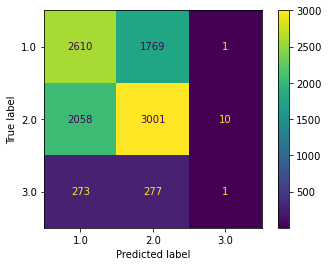

ingr acc 0.5612 Time: 2.711766004562378

 LinearSVC  :


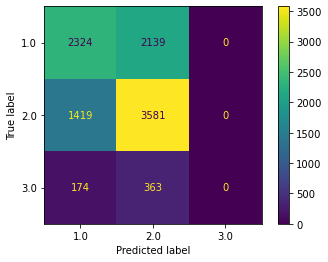

name acc 0.5905 Time: 10.679764747619629


C:\Users\84907\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


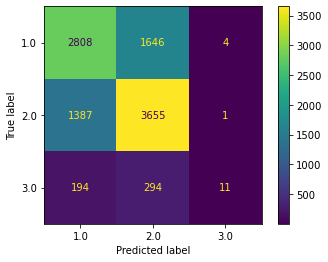

steps acc 0.6474 Time: 22.306931018829346


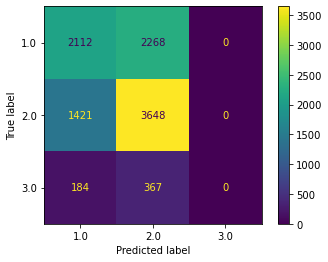

ingr acc 0.576 Time: 18.71131181716919

 LogisticRegression  :


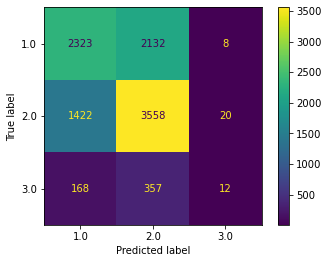

name acc 0.5893 Time: 0.6871614456176758


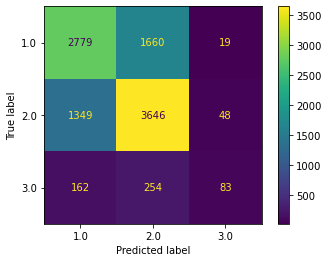

steps acc 0.6508 Time: 0.95444655418396


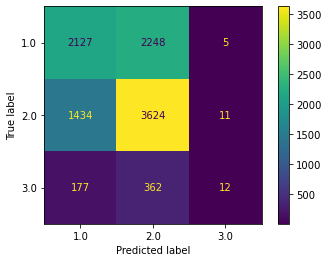

ingr acc 0.5763 Time: 0.8078393936157227

 XGBClassifier  :


C:\Users\84907\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


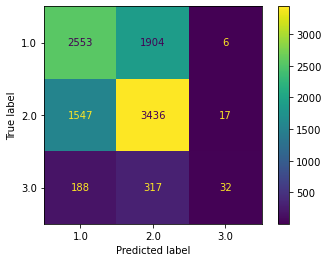

name acc 0.6021 Time: 34.01591658592224
[00:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


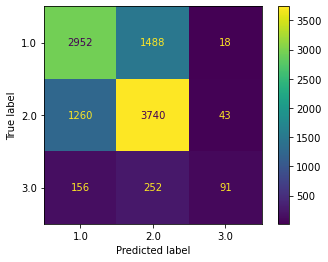

steps acc 0.6783 Time: 34.16237688064575
[00:39:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


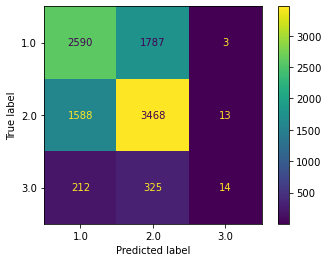

ingr acc 0.6072 Time: 35.66615915298462


In [23]:
# Random Forest, LinearSVC and Logistic Regression and XGBoost for doc2vec50 data without feature selection

X_name_train, X_name_test, Y_name_train, Y_name_test = train_test_split(train_name_doc2vec50, y_train)

X_steps_train, X_steps_test, Y_steps_train, Y_steps_test = train_test_split(train_steps_doc2vec50, y_train)

X_ingr_train, X_ingr_test, Y_ingr_train, Y_ingr_test = train_test_split(train_ingr_doc2vec50, y_train)


models = [RandomForestClassifier(n_estimators=10),
          svm.LinearSVC(),
          LogisticRegression(solver='lbfgs', max_iter=1000),
          XGBClassifier()
         ]
titles = ['Random Forest',
          'LinearSVC',
          'LogisticRegression',
          'XGBClassifier']



Trains = [(X_name_train, Y_name_train), (X_steps_train, Y_steps_train), (X_ingr_train, Y_ingr_train)]
Tests = [(X_name_test, Y_name_test), (X_steps_test, Y_steps_test), (X_ingr_test, Y_ingr_test)]
X_names = ['name', 'steps', 'ingr']
for title, model in zip(titles, models):
    print('\n',title, ' :')
    for X_name, Train, Test in zip(X_names, Trains,Tests):
        start = time.time()
        X_train_t, y_train_t = Train
        X_test_t, y_test_t = Test
        model.fit(X_train_t,  y_train_t)
        acc = model.score(X_test_t,  y_test_t)
        plot_confusion_matrix(model, X_test_t,y_test_t)  
        plt.show()  
        end = time.time()
        t = end - start
        print(X_name, 'acc',  acc, 'Time:', t)


(10000, 25) (30000, 25)
(10000, 25) (30000, 25)
(10000, 25) (30000, 25)

 Random Forest  :


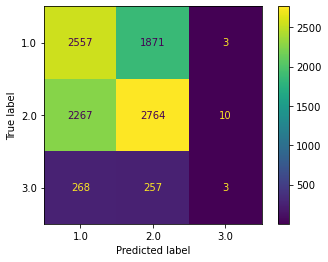

name acc 0.5324 Time: 2.0034518241882324


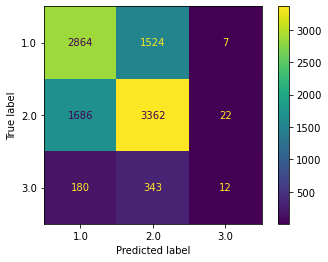

steps acc 0.6238 Time: 1.9528377056121826


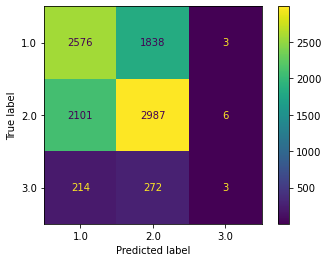

ingr acc 0.5566 Time: 2.059931993484497

 LinearSVC  :


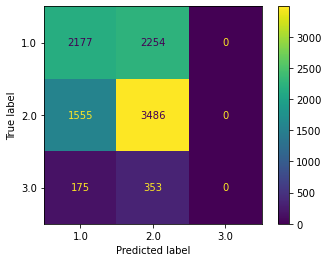

name acc 0.5663 Time: 4.906021356582642


C:\Users\84907\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


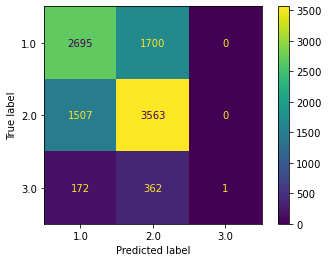

steps acc 0.6259 Time: 16.734550714492798


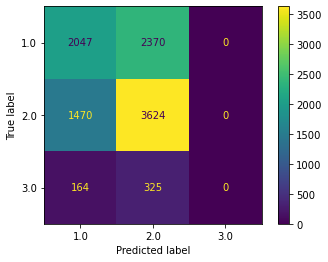

ingr acc 0.5671 Time: 4.689813852310181

 LogisticRegression  :


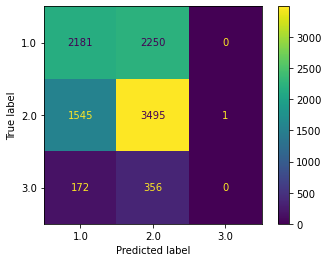

name acc 0.5676 Time: 0.6163506507873535


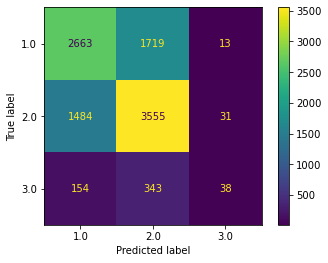

steps acc 0.6256 Time: 0.5206067562103271


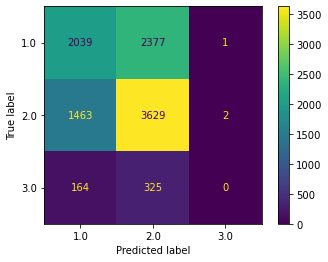

ingr acc 0.5668 Time: 0.5435471534729004

 XGBClassifier  :


C:\Users\84907\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


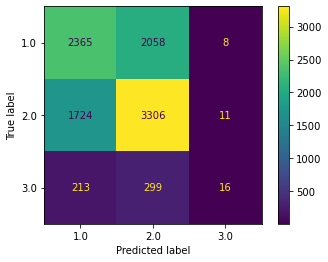

name acc 0.5687 Time: 18.52142310142517
[00:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


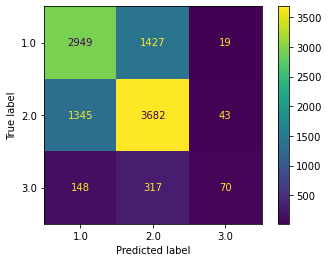

steps acc 0.6701 Time: 19.156397819519043
[00:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


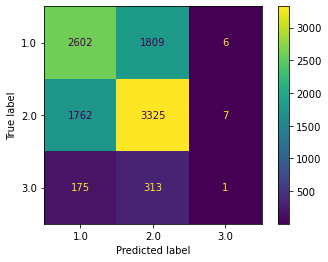

ingr acc 0.5928 Time: 19.016156911849976


In [24]:
# Random Forest, LinearSVC and Logistic Regression and XGBoost for doc2vec50 data with feature selection

X_name_train, X_name_test, Y_name_train, Y_name_test = train_test_split(train_name_doc2vec50, y_train)

X_steps_train, X_steps_test, Y_steps_train, Y_steps_test = train_test_split(train_steps_doc2vec50, y_train)

X_ingr_train, X_ingr_test, Y_ingr_train, Y_ingr_test = train_test_split(train_ingr_doc2vec50, y_train)

name_mi = SelectPercentile(score_func=mutual_info_classif, percentile=50)
X_name_train_mi = name_mi.fit_transform(X_name_train,Y_name_train)
X_name_test_mi = name_mi.transform(X_name_test)

print(X_name_test_mi.shape, X_name_train_mi.shape)

steps_mi = SelectPercentile(score_func=mutual_info_classif, percentile=50)
X_steps_train_mi = steps_mi.fit_transform(X_steps_train,Y_steps_train)
X_steps_test_mi = steps_mi.transform(X_steps_test)

print(X_steps_test_mi.shape, X_steps_train_mi.shape)

ingr_mi = SelectPercentile(score_func=mutual_info_classif, percentile=50)
X_ingr_train_mi = ingr_mi.fit_transform(X_ingr_train,Y_ingr_train)
X_ingr_test_mi = ingr_mi.transform(X_ingr_test)

print(X_ingr_test_mi.shape, X_ingr_train_mi.shape)

models = [RandomForestClassifier(n_estimators=10),
          svm.LinearSVC(),
          LogisticRegression(solver='lbfgs', max_iter=1000),
          XGBClassifier()
         ]
titles = ['Random Forest',
          'LinearSVC',
          'LogisticRegression',
          'XGBClassifier']



Trains = [(X_name_train_mi, Y_name_train), (X_steps_train_mi, Y_steps_train), (X_ingr_train_mi, Y_ingr_train)]
Tests = [(X_name_test_mi, Y_name_test), (X_steps_test_mi, Y_steps_test), (X_ingr_test_mi, Y_ingr_test)]
X_names = ['name', 'steps', 'ingr']
for title, model in zip(titles, models):
    print('\n',title, ' :')
    for X_name, Train, Test in zip(X_names, Trains,Tests):
        start = time.time()
        X_train_t, y_train_t = Train
        X_test_t, y_test_t = Test
        model.fit(X_train_t,  y_train_t)
        acc = model.score(X_test_t,  y_test_t)
        plot_confusion_matrix(model, X_test_t,y_test_t)  
        plt.show()  
        end = time.time()
        t = end - start
        print(X_name, 'acc',  acc, 'Time:', t)



 Random Forest  :


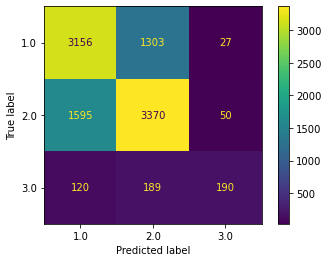

name acc 0.6716 Time: 12.061058521270752


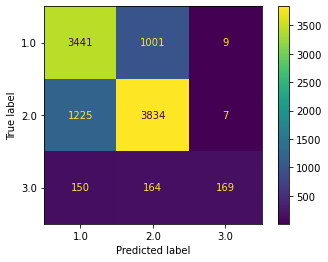

steps acc 0.7444 Time: 8.086654663085938


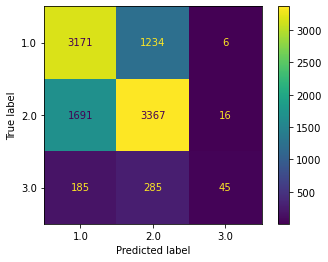

ingr acc 0.6583 Time: 5.543392658233643

 LinearSVC  :


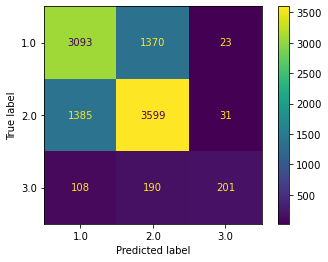

name acc 0.6893 Time: 1.4090297222137451


C:\Users\84907\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


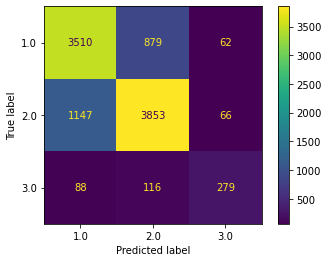

steps acc 0.7642 Time: 14.364761114120483


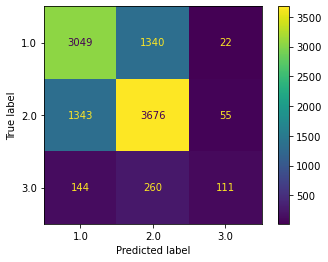

ingr acc 0.6836 Time: 11.950305223464966

 LogisticRegression  :


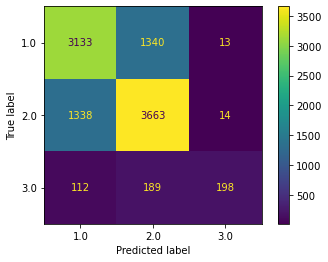

name acc 0.6994 Time: 2.7238216400146484


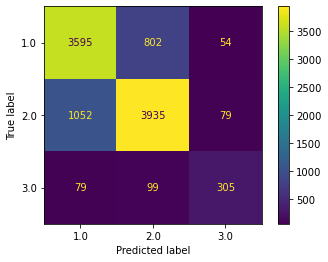

steps acc 0.7835 Time: 16.42351746559143


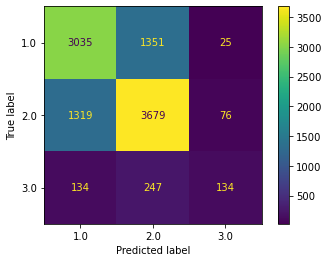

ingr acc 0.6848 Time: 5.226431846618652

 XGBClassifier  :
[00:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\84907\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


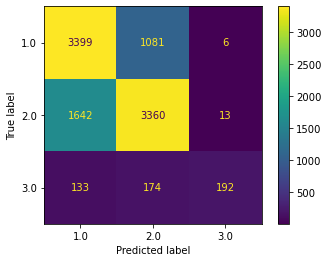

name acc 0.6951 Time: 2.080009937286377
[00:58:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


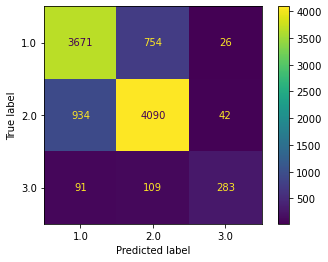

steps acc 0.8044 Time: 10.109407663345337
[00:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


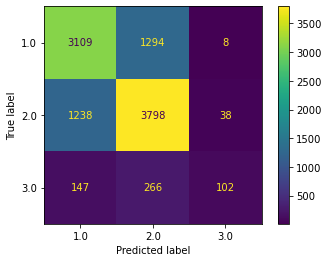

ingr acc 0.7009 Time: 3.586956739425659


In [25]:
# Random Forest, LinearSVC and Logistic Regression and XGBoost for Count Vectorize data without feature selection

X_name_train, X_name_test, Y_name_train, Y_name_test = train_test_split(train_name_vec, y_train)

X_steps_train, X_steps_test, Y_steps_train, Y_steps_test = train_test_split(train_steps_vec, y_train)

X_ingr_train, X_ingr_test, Y_ingr_train, Y_ingr_test = train_test_split(train_ingr_vec, y_train)


models = [RandomForestClassifier(n_estimators=10),
          svm.LinearSVC(),
          LogisticRegression(solver='lbfgs', max_iter=1000),
          XGBClassifier()
         ]
titles = ['Random Forest',
          'LinearSVC',
          'LogisticRegression',
          'XGBClassifier']



Trains = [(X_name_train, Y_name_train), (X_steps_train, Y_steps_train), (X_ingr_train, Y_ingr_train)]
Tests = [(X_name_test, Y_name_test), (X_steps_test, Y_steps_test), (X_ingr_test, Y_ingr_test)]
X_names = ['name', 'steps', 'ingr']
for title, model in zip(titles, models):
    print('\n',title, ' :')
    for X_name, Train, Test in zip(X_names, Trains,Tests):
        start = time.time()
        X_train_t, y_train_t = Train
        X_test_t, y_test_t = Test
        model.fit(X_train_t,  y_train_t)
        acc = model.score(X_test_t,  y_test_t)
        plot_confusion_matrix(model, X_test_t,y_test_t)  
        plt.show()  
        end = time.time()
        t = end - start
        print(X_name, 'acc',  acc, 'Time:', t)


(10000, 5446) (30000, 5446)
(10000, 8983) (30000, 8983)
(10000, 1453) (30000, 1453)

 Random Forest  :


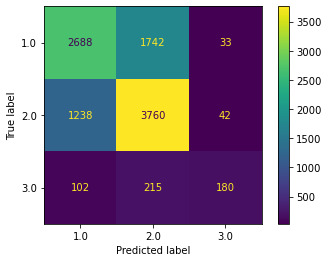

name acc 0.6628 Time: 5.464444637298584


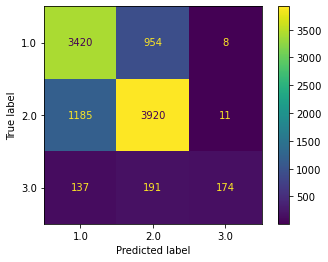

steps acc 0.7514 Time: 6.059185266494751


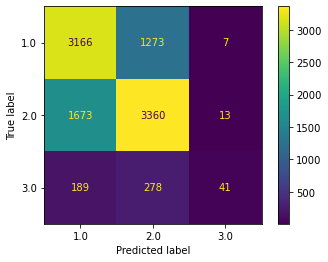

ingr acc 0.6567 Time: 5.171183109283447

 LinearSVC  :


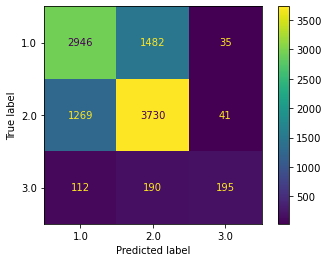

name acc 0.6871 Time: 1.282318353652954


C:\Users\84907\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


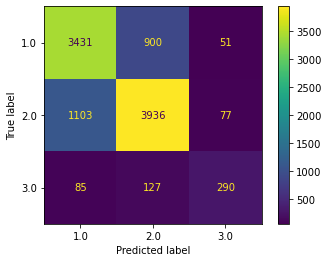

steps acc 0.7657 Time: 13.282178401947021


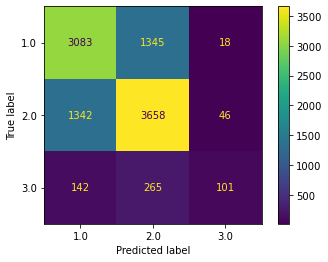

ingr acc 0.6842 Time: 10.368359088897705

 LogisticRegression  :


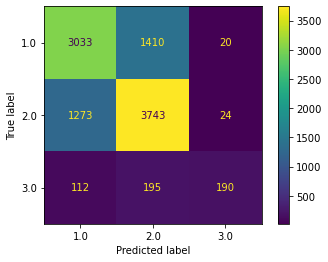

name acc 0.6966 Time: 2.1841559410095215


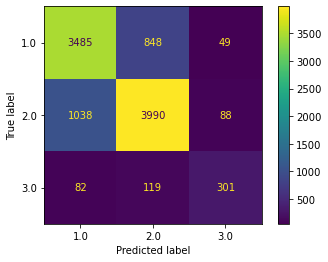

steps acc 0.7776 Time: 14.00153923034668


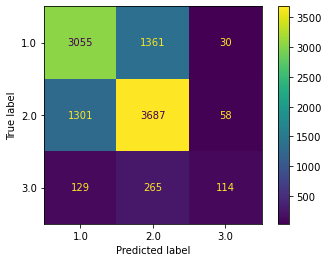

ingr acc 0.6856 Time: 4.770238161087036

 XGBClassifier  :
[01:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\84907\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


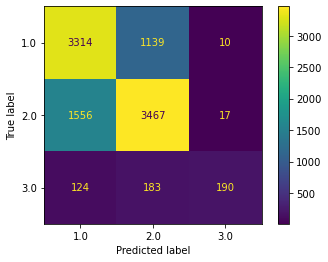

name acc 0.6971 Time: 1.6406197547912598
[01:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


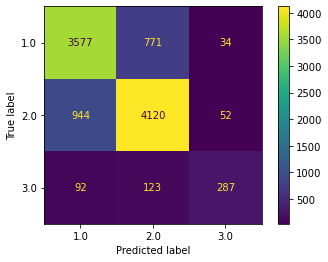

steps acc 0.7984 Time: 9.78580904006958
[01:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


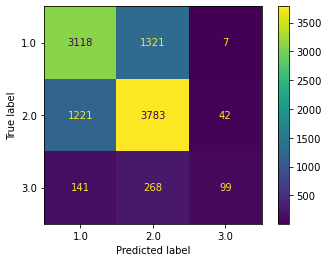

ingr acc 0.7 Time: 3.5445165634155273


In [26]:
# Random Forest, LinearSVC and Logistic Regression and XGBoost for Count Vectorize data with feature selection

X_name_train, X_name_test, Y_name_train, Y_name_test = train_test_split(train_name_vec, y_train)

X_steps_train, X_steps_test, Y_steps_train, Y_steps_test = train_test_split(train_steps_vec, y_train)

X_ingr_train, X_ingr_test, Y_ingr_train, Y_ingr_test = train_test_split(train_ingr_vec, y_train)


name_mi = SelectPercentile(score_func=mutual_info_classif, percentile=50)
X_name_train_mi = name_mi.fit_transform(X_name_train,Y_name_train)
X_name_test_mi = name_mi.transform(X_name_test)

print(X_name_test_mi.shape, X_name_train_mi.shape)

steps_mi = SelectPercentile(score_func=mutual_info_classif, percentile=50)
X_steps_train_mi = steps_mi.fit_transform(X_steps_train,Y_steps_train)
X_steps_test_mi = steps_mi.transform(X_steps_test)

print(X_steps_test_mi.shape, X_steps_train_mi.shape)

ingr_mi = SelectPercentile(score_func=mutual_info_classif, percentile=50)
X_ingr_train_mi = ingr_mi.fit_transform(X_ingr_train,Y_ingr_train)
X_ingr_test_mi = ingr_mi.transform(X_ingr_test)

print(X_ingr_test_mi.shape, X_ingr_train_mi.shape)

models = [RandomForestClassifier(n_estimators=10),
          svm.LinearSVC(),
          LogisticRegression(solver='lbfgs', max_iter=1000),
          XGBClassifier()
         ]
titles = ['Random Forest',
          'LinearSVC',
          'LogisticRegression',
          'XGBClassifier']



Trains = [(X_name_train_mi, Y_name_train), (X_steps_train_mi, Y_steps_train), (X_ingr_train_mi, Y_ingr_train)]
Tests = [(X_name_test_mi, Y_name_test), (X_steps_test_mi, Y_steps_test), (X_ingr_test_mi, Y_ingr_test)]
X_names = ['name', 'steps', 'ingr']
for title, model in zip(titles, models):
    print('\n',title, ' :')
    for X_name, Train, Test in zip(X_names, Trains,Tests):
        start = time.time()
        X_train_t, y_train_t = Train
        X_test_t, y_test_t = Test
        model.fit(X_train_t,  y_train_t)
        acc = model.score(X_test_t,  y_test_t)
        plot_confusion_matrix(model, X_test_t,y_test_t)  
        plt.show()  
        end = time.time()
        t = end - start
        print(X_name, 'acc',  acc, 'Time:', t)


In [27]:
# merge the Doc2Vec from 50 features to the sparse matrix of the Bag-of-Word from the CountVectorizer
steps_training_data = scipy.sparse.hstack((train_steps_vec, train_steps_doc2vec50))
steps_test_data = scipy.sparse.hstack((test_steps_vec, test_steps_doc2vec50))

name_training_data = scipy.sparse.hstack((train_name_vec, train_name_doc2vec50))
name_test_data = scipy.sparse.hstack((test_name_vec, test_name_doc2vec50))

ingr_training_data = scipy.sparse.hstack((train_ingr_vec, train_ingr_doc2vec50))
ingr_test_data = scipy.sparse.hstack((test_ingr_vec, test_ingr_doc2vec50))

In [28]:
# split the data to training and testing data using holdout approach
X_name_train, X_name_test, Y_name_train, Y_name_test = train_test_split(name_training_data, y_train)

X_steps_train, X_steps_test, Y_steps_train, Y_steps_test = train_test_split(steps_training_data, y_train)

X_ingr_train, X_ingr_test, Y_ingr_train, Y_ingr_test = train_test_split(ingr_training_data, y_train)


In [29]:
# feature selection top 50% feature from the training and testing data using mutual information technique
name_mi = SelectPercentile(score_func=mutual_info_classif, percentile=50)
X_name_train_mi = name_mi.fit_transform(X_name_train,Y_name_train)
X_name_test_mi = name_mi.transform(X_name_test)

print(X_name_test_mi.shape, X_name_train_mi.shape)

steps_mi = SelectPercentile(score_func=mutual_info_classif, percentile=50)
X_steps_train_mi = steps_mi.fit_transform(X_steps_train,Y_steps_train)
X_steps_test_mi = steps_mi.transform(X_steps_test)

print(X_steps_test_mi.shape, X_steps_train_mi.shape)

ingr_mi = SelectPercentile(score_func=mutual_info_classif, percentile=50)
X_ingr_train_mi = ingr_mi.fit_transform(X_ingr_train,Y_ingr_train)
X_ingr_test_mi = ingr_mi.transform(X_ingr_test)

print(X_ingr_test_mi.shape, X_ingr_train_mi.shape)


(10000, 5471) (30000, 5471)
(10000, 9008) (30000, 9008)
(10000, 1478) (30000, 1478)


 XGB model combined data: 


C:\Users\84907\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


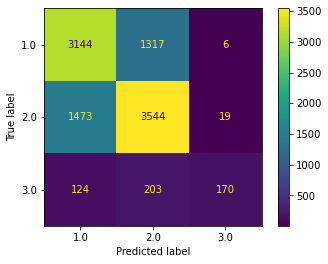

name acc 0.6858 Time: 84.67863869667053
[00:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


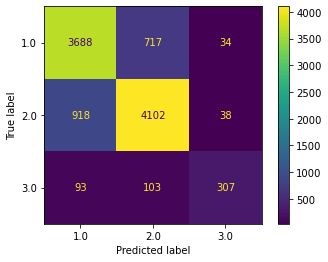

steps acc 0.8097 Time: 113.09976124763489
[00:20:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


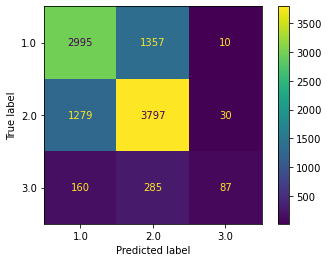

ingr acc 0.6879 Time: 38.03614830970764


In [22]:
# XGBoost with combined data and feature selection
Trains = [(X_name_train_mi, Y_name_train), (X_steps_train_mi, Y_steps_train), (X_ingr_train_mi, Y_ingr_train)]
Tests = [(X_name_test_mi, Y_name_test), (X_steps_test_mi, Y_steps_test), (X_ingr_test_mi, Y_ingr_test)]
X_names = ['name', 'steps', 'ingr']
print(' XGB model combined data: ')
model = XGBClassifier()
for X_name, Train, Test in zip(X_names, Trains,Tests):
        start = time.time()
        X_train_t, y_train_t = Train
        X_test_t, y_test_t = Test
        model.fit(X_train_t,  y_train_t)
        acc = model.score(X_test_t,  y_test_t)
        plot_confusion_matrix(model, X_test_t,y_test_t)  
        plt.show()  
        end = time.time()
        t = end - start
        print(X_name, 'acc',  acc, 'Time:', t)


 Random Forest  :


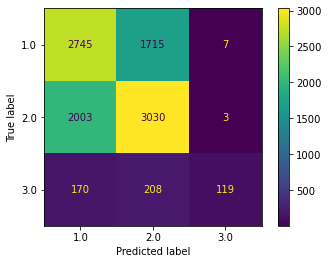

name acc 0.5894 Time: 5.150906562805176


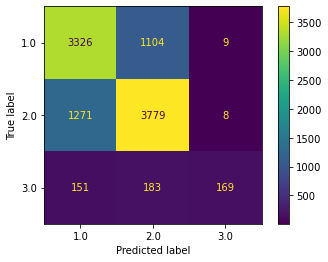

steps acc 0.7274 Time: 6.490891933441162


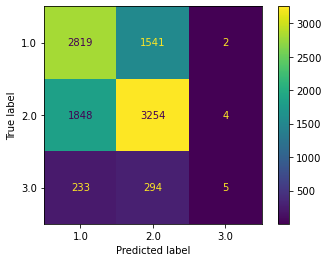

ingr acc 0.6078 Time: 6.733395338058472

 LinearSVC  :


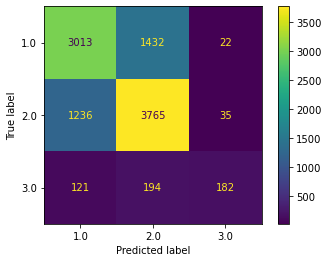

name acc 0.696 Time: 11.531050443649292


C:\Users\84907\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


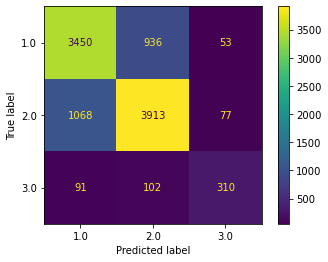

steps acc 0.7673 Time: 22.290990591049194


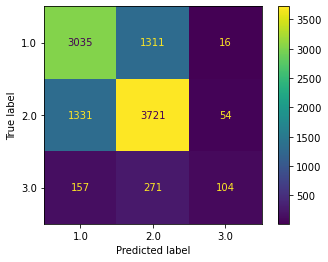

ingr acc 0.686 Time: 26.413410186767578

 LogisticRegression  :


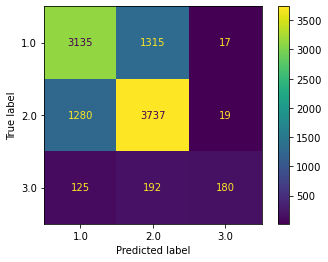

name acc 0.7052 Time: 5.314779758453369


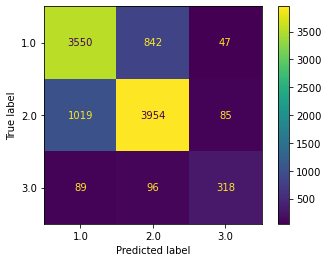

steps acc 0.7822 Time: 25.352441787719727


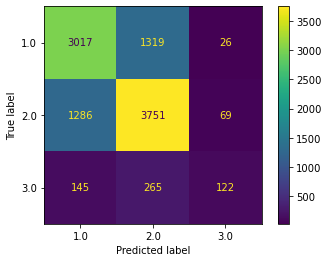

ingr acc 0.689 Time: 10.29019284248352


In [21]:
# Random Forest, LinearSVC and Logistic Regression for combined data with feature selection
models = [RandomForestClassifier(n_estimators=10),
          svm.LinearSVC(),
          LogisticRegression(solver='lbfgs', max_iter=1000)
         ]
titles = ['Random Forest',
          'LinearSVC',
          'LogisticRegression']



Trains = [(X_name_train_mi, Y_name_train), (X_steps_train_mi, Y_steps_train), (X_ingr_train_mi, Y_ingr_train)]
Tests = [(X_name_test_mi, Y_name_test), (X_steps_test_mi, Y_steps_test), (X_ingr_test_mi, Y_ingr_test)]
X_names = ['name', 'steps', 'ingr']
for title, model in zip(titles, models):
    print('\n',title, ' :')
    for X_name, Train, Test in zip(X_names, Trains,Tests):
        start = time.time()
        X_train_t, y_train_t = Train
        X_test_t, y_test_t = Test
        model.fit(X_train_t,  y_train_t)
        acc = model.score(X_test_t,  y_test_t)
        plot_confusion_matrix(model, X_test_t,y_test_t)  
        plt.show()  
        end = time.time()
        t = end - start
        print(X_name, 'acc',  acc, 'Time:', t)



 Random Forest  :


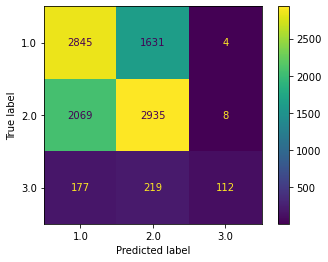

name acc 0.5892 Time: 6.160486698150635


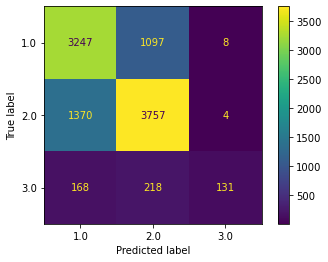

steps acc 0.7135 Time: 7.476030111312866


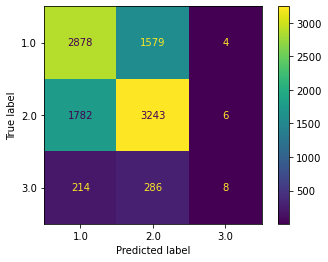

ingr acc 0.6129 Time: 6.1186299324035645

 LinearSVC  :


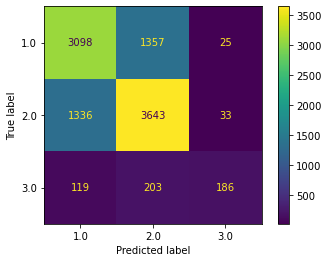

name acc 0.6927 Time: 12.270973682403564


C:\Users\84907\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


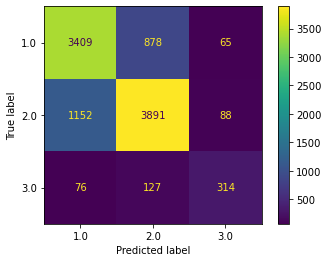

steps acc 0.7614 Time: 22.079925775527954


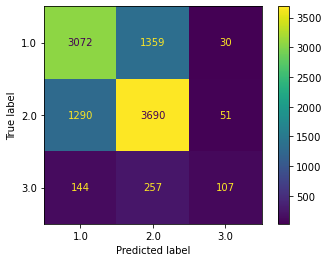

ingr acc 0.6869 Time: 26.308427810668945

 LogisticRegression  :


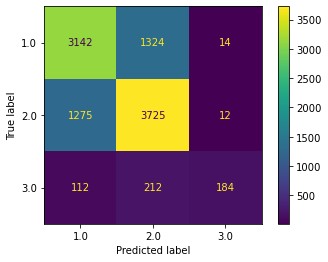

name acc 0.7051 Time: 5.5561347007751465


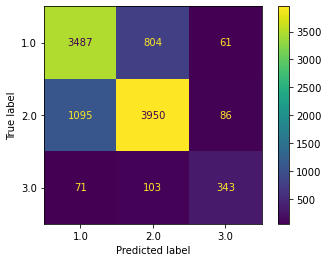

steps acc 0.778 Time: 28.86078381538391


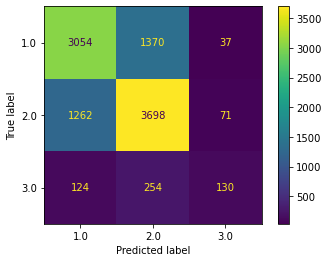

ingr acc 0.6882 Time: 11.382546663284302

 XGBClassifier  :


C:\Users\84907\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


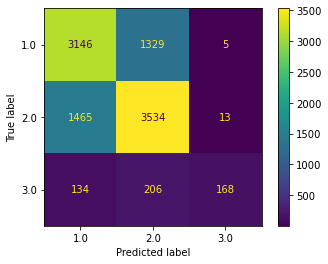

name acc 0.6848 Time: 106.83334732055664
[01:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


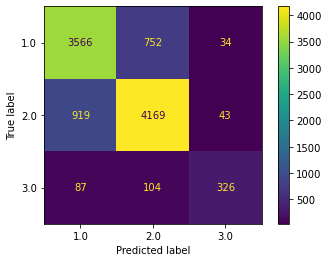

steps acc 0.8061 Time: 115.51494431495667
[01:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


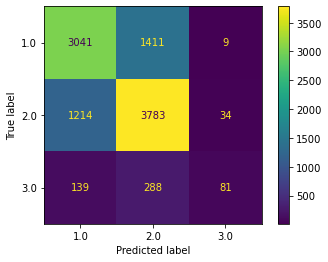

ingr acc 0.6905 Time: 52.93836545944214


In [30]:
# Random Forest, LinearSVC and Logistic Regression and XGBoost for Combined data without feature selection

X_name_train, X_name_test, Y_name_train, Y_name_test = train_test_split(name_training_data, y_train)

X_steps_train, X_steps_test, Y_steps_train, Y_steps_test = train_test_split(steps_training_data, y_train)

X_ingr_train, X_ingr_test, Y_ingr_train, Y_ingr_test = train_test_split(ingr_training_data, y_train)


models = [RandomForestClassifier(n_estimators=10),
          svm.LinearSVC(),
          LogisticRegression(solver='lbfgs', max_iter=1000),
          XGBClassifier()
         ]
titles = ['Random Forest',
          'LinearSVC',
          'LogisticRegression',
          'XGBClassifier']



Trains = [(X_name_train, Y_name_train), (X_steps_train, Y_steps_train), (X_ingr_train, Y_ingr_train)]
Tests = [(X_name_test, Y_name_test), (X_steps_test, Y_steps_test), (X_ingr_test, Y_ingr_test)]
X_names = ['name', 'steps', 'ingr']
for title, model in zip(titles, models):
    print('\n',title, ' :')
    for X_name, Train, Test in zip(X_names, Trains,Tests):
        start = time.time()
        X_train_t, y_train_t = Train
        X_test_t, y_test_t = Test
        model.fit(X_train_t,  y_train_t)
        acc = model.score(X_test_t,  y_test_t)
        plot_confusion_matrix(model, X_test_t,y_test_t)  
        plt.show()  
        end = time.time()
        t = end - start
        print(X_name, 'acc',  acc, 'Time:', t)

In [31]:
# apply XGboost with feature selection for the whole data for the whole training data
mi = SelectPercentile(score_func=mutual_info_classif, percentile=50)
X_train_mi = mi.fit_transform(steps_training_data,y_train)
X_test_mi = mi.transform(steps_test_data)

print(X_test_mi.shape, X_train_mi.shape)


(10000, 9008) (40000, 9008)


In [32]:
# predict and export to pdf file
model = XGBClassifier()

model.fit( X_train_mi,y_train) 
predict = model.predict(X_test_mi)
predict_dict = {'id':list(range(1,10001)),'duration_label': predict }

df = pd.DataFrame(predict_dict, columns= ['id', 'duration_label'])
df.to_csv (r'export_dataframe.csv', index = False, header=True)

C:\Users\84907\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
